<a href="https://colab.research.google.com/github/TonyStone23/Summer_Research_2025/blob/main/weekOne/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Gather Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE

In [14]:
# Random state
randomState = 42
# Gather the Dataset
data = pd.read_csv('student_scores.csv')


In [15]:
data.shape

(25, 2)

In [16]:
# Organize the Data
X = data.drop('Scores', axis=1)
y = data['Scores']

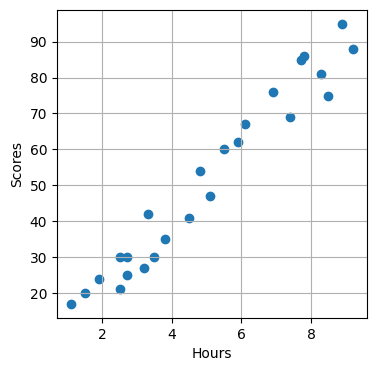

In [17]:
# Set up and decorate plot
plt.figure(figsize = (4, 4))
plt.scatter(X, y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

In [18]:
# Split dataset into draining and testing data
X_train, X_test, y_train, y_test = tts(X, y, test_size = .2, random_state = randomState)

In [19]:
# Initialize and fit the model
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

In [20]:
# Determine slope and intercept
bias = LR.intercept_
weight = LR.coef_
print(f"bias: {bias:.2f}\nweight: {weight}")
print(f"y = {bias} + {weight}X")

bias: 2.83
weight: [9.68207815]
y = 2.826892353899737 + [9.68207815]X


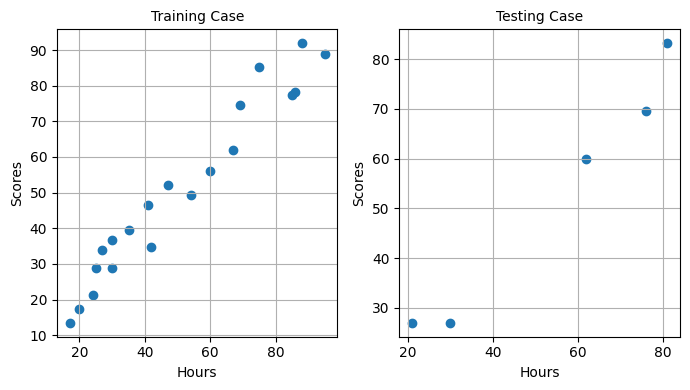

In [21]:
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)
plt.figure(figsize = (7, 4))

# Subplot one
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Training Case', fontsize = 10)
plt.grid(True)

# Subplot two
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Testing Case', fontsize = 10)
plt.grid(True)

plt.tight_layout()
plt.show()

In [22]:
# Evaluate the Model Performance

mse_train = MSE(y_train, y_pred_train)
mae_train = MAE(y_train, y_pred_train)

mse_test = MSE(y_test, y_pred_test)
mae_test = MAE(y_test, y_pred_test)

In [23]:
# Organize model metrics into dataframe

performance = pd.DataFrame({
    'Metric':['MSE', 'MAE', 'MSE', 'MAE'],
    'DataType':['train', 'test', 'train', 'test'],
    'Values':[mse_train, mae_train, mse_test, mae_test]
})

In [24]:
# Display the model's performance
performance.T

,0,1,2,3
Metric,MSE,MAE,MSE,MAE
DataType,train,test,train,test
Values,31.454836,5.221357,18.943212,3.920751
